In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import sidetable

In [2]:
import os,glob
g = os.getcwd()
g
path = 'D:\\repos\\CIAT\\IDB_PROJECT'
os.chdir(path)

# Read data base and merge

- Read the base line and create ID

In [3]:
Points = gpd.read_file("Data_IDB/new/Zona_influencia_DR.shp")
# print(Points.crs)
Points = Points.to_crs("EPSG:4326")
ID = str(Points["cuest_id_b"]) + str(Points["parcela"])
str1 = [str(int) for int in Points["cuest_id_b"]] 
str2 = [str(int) for int in Points["parcela"]]
Points["ID"] = [int(s1 + s2) for s1, s2 in zip(str1, str2)]
ok = Points[Points['corregido2'].str.contains("ok")]
base = ok[["cultivo","superf_par","patca","correccion","corregido","corregido2","area","ID","temporary_",'geometry']]
base["time"] = "Baseline"
# Points.to_csv("test.csv")
# Points = eeconvert.gdfToFc(Points)
# ok.columns
len(base)
base[base.ID == 386511]

C:\Users\fmontenegro\Miniconda3\envs\GEE\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,cultivo,superf_par,patca,correccion,corregido,corregido2,area,ID,temporary_,geometry,time
29,pasto,1.572,1,"el punto esta sobre la vía, mover hacia la izq...",Se movió hacia la izquierda,"ok, arbustos",8558.239,386511,0,"POLYGON ((-71.68074 18.87789, -71.68048 18.877...",Baseline


- Read the follow-Up-1, create ID and remove duplicate ID

In [4]:
followup = pd.read_csv("Data_IDB/Panel_data_PATCA-DR-only_FU1.csv", encoding='latin-1')

In [5]:
followup[followup["cuest_id_b"]==3863]
# print(follwup.columns)
str1 = [str(int) for int in followup["cuest_id_b"]] 
str2 = [str(int) for int in followup["parcela"]]
followup["ID"] = [int(s1 + s2) for s1, s2 in zip(str1, str2)]
FU1 = followup[["ID","time",'temporary_crop',"cultivo"]]
print(len(FU1))
ID = FU1["ID"].drop_duplicates()
FU1 = FU1.loc[ID.index.tolist()]
print(len(FU1))
FU1[FU1.ID == 386511]

646
441


,ID,time,temporary_crop,cultivo
473,386511,1. Follow-up1,1,mani


- Merge dateset

In [6]:
survey = base.merge(FU1,how='inner', on="ID")
print(len(survey))
survey.head()

377


,cultivo_x,superf_par,patca,correccion,corregido,corregido2,area,ID,temporary_,geometry,time_x,time_y,temporary_crop,cultivo_y
0,tabaco,4.275839,1,centrar,"se movió hacia arriba y la izquierda, la zona ...","ok, revisar tipo cultivo",15123.502,386311,1,"POLYGON ((-71.70753 18.89259, -71.70756 18.892...",Baseline,1. Follow-up1,1,maiz grano/mazorca
1,yuca,1.886400,1,ok,ok,ok,15123.949,386512,1,"POLYGON ((-71.68327 18.70962, -71.68330 18.709...",Baseline,1. Follow-up1,0,NaN
2,sandia,1.886400,0,Revisar área,se movió hacía la derecha,ok,11223.063,396011,1,"POLYGON ((-70.82647 18.39846, -70.82628 18.397...",Baseline,1. Follow-up1,1,tomate industrial
3,tayota,3.772800,1,ok,ok,ok,8284.331,407811,0,"POLYGON ((-70.88998 18.74631, -70.89012 18.746...",Baseline,1. Follow-up1,0,cafe
4,tomate industrial,3.898560,0,ok,ok,"ok, revisar tipo cultivo",15139.726,411411,1,"POLYGON ((-70.84436 18.43130, -70.84439 18.431...",Baseline,1. Follow-up1,1,tomate industrial


In [7]:
survey["trends"] = "nan"
survey.trends[survey.temporary_ ==  survey.temporary_crop] = "trend"
survey.trends[survey.temporary_ !=  survey.temporary_crop] = "no trend"
survey

<ipython-input-7-2ea1cd467a31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  survey.trends[survey.temporary_ ==  survey.temporary_crop] = "trend"
<ipython-input-7-2ea1cd467a31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  survey.trends[survey.temporary_ !=  survey.temporary_crop] = "no trend"


,cultivo_x,superf_par,patca,correccion,corregido,corregido2,area,ID,temporary_,geometry,time_x,time_y,temporary_crop,cultivo_y,trends
0,tabaco,4.275839,1,centrar,"se movió hacia arriba y la izquierda, la zona ...","ok, revisar tipo cultivo",15123.502,386311,1,"POLYGON ((-71.70753 18.89259, -71.70756 18.892...",Baseline,1. Follow-up1,1,maiz grano/mazorca,trend
1,yuca,1.886400,1,ok,ok,ok,15123.949,386512,1,"POLYGON ((-71.68327 18.70962, -71.68330 18.709...",Baseline,1. Follow-up1,0,NaN,no trend
2,sandia,1.886400,0,Revisar área,se movió hacía la derecha,ok,11223.063,396011,1,"POLYGON ((-70.82647 18.39846, -70.82628 18.397...",Baseline,1. Follow-up1,1,tomate industrial,trend
3,tayota,3.772800,1,ok,ok,ok,8284.331,407811,0,"POLYGON ((-70.88998 18.74631, -70.89012 18.746...",Baseline,1. Follow-up1,0,cafe,trend
4,tomate industrial,3.898560,0,ok,ok,"ok, revisar tipo cultivo",15139.726,411411,1,"POLYGON ((-70.84436 18.43130, -70.84439 18.431...",Baseline,1. Follow-up1,1,tomate industrial,trend
5,cero,1.257600,0,revisar área,ok,ok,15121.632,371811,0,"POLYGON ((-71.78116 18.42456, -71.78119 18.424...",Baseline,1. Follow-up1,1,lechoza,no trend
6,habichuela negra,2.200800,0,mover hacia arriba,ok,ok,15125.844,372011,1,"POLYGON ((-71.59291 18.31784, -71.59294 18.317...",Baseline,1. Follow-up1,0,NaN,no trend
7,habichuela negra,2.515200,0,revisar área,"ok, revisar tipo",ok,15126.389,372211,1,"POLYGON ((-71.56737 18.34700, -71.56740 18.346...",Baseline,1. Follow-up1,1,berenjenas chinas,trend
8,habichuela negra,2.263680,0,revisar área,"ok, revisar tipo",ok,15126.342,372311,1,"POLYGON ((-71.56869 18.34750, -71.56872 18.347...",Baseline,1. Follow-up1,1,berenjenas chinas,trend
9,limon,20.121597,1,revisar el tipo de cultivo y el área,ok,ok,14688.362,372611,0,"POLYGON ((-70.98751 18.69221, -70.98782 18.691...",Baseline,1. Follow-up1,0,pasto,trend


- Select ID with trend

In [8]:
survey[(survey.ID==396011) & (survey.trends=="trend")]
# type(trends.ID[0])

,cultivo_x,superf_par,patca,correccion,corregido,corregido2,area,ID,temporary_,geometry,time_x,time_y,temporary_crop,cultivo_y,trends
2,sandia,1.8864,0,Revisar área,se movió hacía la derecha,ok,11223.063,396011,1,"POLYGON ((-70.82647 18.39846, -70.82628 18.397...",Baseline,1. Follow-up1,1,tomate industrial,trend


In [9]:
survey[survey.ID==396011]

,cultivo_x,superf_par,patca,correccion,corregido,corregido2,area,ID,temporary_,geometry,time_x,time_y,temporary_crop,cultivo_y,trends
2,sandia,1.8864,0,Revisar área,se movió hacía la derecha,ok,11223.063,396011,1,"POLYGON ((-70.82647 18.39846, -70.82628 18.397...",Baseline,1. Follow-up1,1,tomate industrial,trend


# read predictions kendal and CCDC

- read Kendal

In [71]:
deseason_kendal = pd.read_csv("Data_IDB/deseason_kendal_osavi_2014.csv")
kendal = pd.read_csv("Data_IDB/kendal_osavi_2014.csv")
deseason_kendal.head()

,Unnamed: 0,ID,trend_Ori,Pvalue_Ori,trends_Mod_yue,Pvalue_Mod_yue,trends_Mod_rao,Pvalue_Mod_rao,trends_seasonal,Pvalue_seasonal,cor_seasonal,Pvalue_seasonal_cor,test
0,0,27611,no trend,0.566761,increasing,0.024881,no trend,0.323759,no trend,0.470101,no trend,0.317311,mandal kendal
1,1,38911,no trend,0.649541,no trend,0.295767,no trend,0.553488,no trend,0.528612,no trend,0.317311,mandal kendal
2,2,39311,no trend,0.177654,increasing,0.001160,no trend,0.177654,no trend,0.243345,no trend,0.317311,mandal kendal
3,3,46611,no trend,0.629203,no trend,0.349216,no trend,0.594474,no trend,0.876393,no trend,0.317311,mandal kendal
4,4,51511,no trend,0.306543,decreasing,0.000434,no trend,0.072295,no trend,0.876393,no trend,0.317311,mandal kendal


kendal mode cor season

In [72]:
kendal["trends"] = "Nan"
kendal.trends[kendal.trend_Ori!="no trend"] = "trend"
kendal.trends[kendal.trend_Ori=="no trend"] = "no trend"
deseason_kendal["trends"] = "Nan"
deseason_kendal.trends[deseason_kendal.trend_Ori!="no trend"] = "trend"
deseason_kendal.trends[deseason_kendal.trend_Ori=="no trend"] = "no trend"


<ipython-input-72-312e9f8f5a85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  kendal.trends[kendal.trend_Ori!="no trend"] = "trend"
<ipython-input-72-312e9f8f5a85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  kendal.trends[kendal.trend_Ori=="no trend"] = "no trend"
<ipython-input-72-312e9f8f5a85>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  deseason_kendal.trends[deseason_kendal.trend_Ori!="no trend"] = "trend"
<ipython-input-72-312e9f8f5a85>:6: SettingWithCopyWarning: 
A va

In [74]:
validacion_kenal= kendal.merge(survey,how='inner', on=["ID","trends"])
print('kendal: ',(len(validacion_kenal)*100)/377)
deseason_kendal
validacion_deseason_kendal= deseason_kendal.merge(survey,how='inner', on=["ID","trends"])
print('deseason_kendal: ',(len(validacion_deseason_kendal)*100)/377)

kendal:  44.56233421750663
deseason_kendal:  26.52519893899204


kendal mode YUE

In [ ]:
kendal["trends"] = "Nan"
kendal.trends[kendal.trends_Mod_yue!="no trend"] = "trend"
kendal.trends[kendal.trends_Mod_yue=="no trend"] = "no trend"
deseason_kendal["trends"] = "Nan"
deseason_kendal.trends[deseason_kendal.trends_Mod_yue!="no trend"] = "trend"
deseason_kendal.trends[deseason_kendal.trends_Mod_yue=="no trend"] = "no trend"

In [75]:
validacion_kenal= kendal.merge(survey,how='inner', on=["ID","trends"])
print('kendal: ',(len(validacion_kenal)*100)/377)
deseason_kendal
validacion_deseason_kendal= deseason_kendal.merge(survey,how='inner', on=["ID","trends"])
print('deseason_kendal: ',(len(validacion_deseason_kendal)*100)/377)

kendal:  44.56233421750663
deseason_kendal:  26.52519893899204


- read CCDC

In [10]:
CCDC = pd.read_csv("Data_IDB/iv_CCDC_2014.csv")

In [11]:
count = CCDC.groupby("ID").count()
count
count["trends"] = None
count.trends[count.numObs==1]="trend"
count.trends[count.numObs>1]="no trend"
# count["ID"] = count.index
count = count[["trends"]]
count.shape

<ipython-input-11-99a861434eb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  count.trends[count.numObs==1]="trend"
<ipython-input-11-99a861434eb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  count.trends[count.numObs>1]="no trend"


(377, 1)

In [12]:
trends_CCDC= CCDC.merge(count,how='inner', on=["ID"])
print(trends_CCDC.shape)
trends_CCDC.drop_duplicates("ID",inplace=True)
print(trends_CCDC.shape)
# CCDC["trends"] = "NaN"
# CCDC.trends[CCDC.tBreak.isna()] = "trend"
# CCDC.trends[CCDC.tBreak.notna()] = "no trend"
# CCDC
# CCDC[CCDC['ID'] == 268811]

(426, 9)
(377, 9)


In [13]:
validacion_CCDC= trends_CCDC.merge(survey,how='inner', on=["ID","trends"])
(len(validacion_CCDC)*100)/377

70.55702917771883

In [14]:
no_merge = survey[survey.ID.isin(validacion_CCDC.ID)]
no_merge = no_merge[["ID","cultivo_x","cultivo_y","superf_par", "area",	"correccion","corregido", "corregido2", "patca","temporary_","temporary_crop","trends","geometry"]]
# no_merge.to_csv("Data_IDB/merge_2014.csv",encoding='latin-1')

In [15]:
gdf = gpd.GeoDataFrame(no_merge, geometry='geometry')
# gdf.to_file("Data_IDB/new/merge_2014.shp")

In [16]:
# validacion_CCDC= CCDC.merge(merge,how='inner', on=["ID"])
validacion_CCDC.columns

Index(['Unnamed: 0', 'ID', 'patca_x', 'geometry_x', 'tStart', 'tEnd', 'tBreak',
       'numObs', 'trends', 'cultivo_x', 'superf_par', 'patca_y', 'correccion',
       'corregido', 'corregido2', 'area', 'temporary_', 'geometry_y', 'time_x',
       'time_y', 'temporary_crop', 'cultivo_y'],
      dtype='object')

In [80]:
table = trends_CCDC.stb.freq(['trends'])
# table.to_csv("Data_IDB/validacion/pactavs_all.csv")
# trends_CCDC[["trends"]]

table

,trends,count,percent,cumulative_count,cumulative_percent
0,trend,330,87.533156,330,87.533156
1,no trend,47,12.466844,377,100.000000


In [31]:
survey.stb.freq(['trends'])
# survey.sort_values("ID")
# survey[["trends"]]

,trends,count,percent,cumulative_count,cumulative_percent
0,trend,277,73.474801,277,73.474801
1,no trend,100,26.525199,377,100.000000


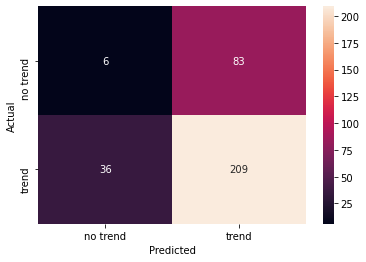

In [79]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

survey.sort_values("ID",inplace=True)
survey
trends_CCDC.sort_values("ID",inplace=True)
trends_CCDC
df = pd.DataFrame()
df["y_true"] = survey.trends
df["y_pred"] = trends_CCDC.trends
df.shape
confusion_matrix = pd.crosstab(df["y_true"] , df['y_pred'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,annot=True, fmt="d")
plt.show()



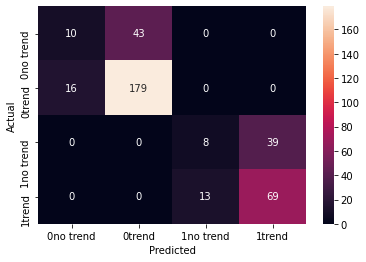

In [30]:
df = pd.DataFrame()
str1 = [str(int) for int in survey["patca"]] 
str2 = [str(int) for int in survey["trends"]]
df["y_true"]= [s1 + s2 for s1, s2 in zip(str1, str2)]
str1 = [str(int) for int in trends_CCDC["patca"]] 
str2 = [str(int) for int in trends_CCDC["trends"]]
df["y_pred"] = [s1 + s2 for s1, s2 in zip(str1, str2)]
# df['y_true'] = df['y_true'].map({'0trend': 3, '0no trend': 2,'1trend': 1, '1no trend': 0})
# df['y_pred'] = df['y_pred'].map({'0trend': 3, '0no trend': 2,'1trend': 1, '1no trend': 0})
confusion_matrix = pd.crosstab(df["y_true"] , df['y_pred'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,annot=True, fmt="d")
plt.show()


In [64]:
data_month = pd.read_csv("Data_IDB/data_monthly.csv")
data_month.ID = data_month.ID.astype(int)
data_month = data_month[data_month.date<"2015-01-01"]

data_month.head()

,date,ID,NDVI,OSAVI,EVI,NWVI
0,2011-01-31,27611,0.584658,0.410583,0.394994,0.017170
1,2011-02-28,27611,0.454664,0.320490,0.297961,0.156363
2,2011-03-31,27611,0.430091,0.311124,0.301504,0.171721
3,2011-04-30,27611,0.407838,0.302638,0.303910,0.171673
4,2011-05-31,27611,0.434607,0.326425,0.337107,0.121377


In [65]:
data_month_merge = data_month.merge(survey,how='inner', on=["ID"])
data_month_merge.columns
data_month_merge = data_month_merge[["ID","NDVI","OSAVI","EVI","patca","trends","temporary_crop"]]
data_month_merge.head()

,ID,NDVI,OSAVI,EVI,patca,trends,temporary_crop
0,27611,0.584658,0.410583,0.394994,0,trend,0
1,27611,0.454664,0.320490,0.297961,0,trend,0
2,27611,0.430091,0.311124,0.301504,0,trend,0
3,27611,0.407838,0.302638,0.303910,0,trend,0
4,27611,0.434607,0.326425,0.337107,0,trend,0


In [66]:
group = data_month_merge.groupby(["patca","temporary_crop"]).mean()
group

ID      NDVI     OSAVI       EVI
patca temporary_crop                                             
0     0               279656.994777  0.558633  0.392176  0.384397
      1               316793.972884  0.574771  0.392141  0.378696
1     0               350561.912392  0.600017  0.414884  0.403487
      1               371724.395386  0.557643  0.382857  0.364855